In [157]:
import csv
import os
import pandas as pd

import csv

def read_measures():
    datos = []
    for i in range(1, 14):
        # Construimos el nombre del archivo
        archivo = f"mediciones/medicion{i}.csv"
        datos_archivo = []

        with open(archivo, 'r', newline='') as csvfile:
            csvreader = csv.reader(csvfile)
            next(csvreader)  # Omitir la primera fila

            for row in csvreader:
                datos_archivo.append(row)

        datos.append(datos_archivo)

    return datos

datos = read_measures()
#ver medición 6 (271.49)

#intercambio índice 1 y 3 en valor_m para que de coherente
valor_m = [221.3, 72.32 , 111.33, 22.13, 128.32, 271.49, 83.37, 83.37, 94.45,138.71, 138.71, 94.45, 83.37 ]
valor_m = [valor + 110.35 for valor in valor_m]
valor_M = [72.32, 72.32, 72.32, 72.32, 72.32, 72.32, 94.45, 72.32, 72.32, 72.32, 72.32, 72.32, 72.32]
print(len(valor_m))
print(len(valor_M))
#Se contaba con tres masas: una bola de madera de 5.83 gramos, una bola de plata de 22.13 gramos, y una bola de oro de 72.32 gramos.
#print(datos)
#print(len(datos))

13
13


In [163]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes los siguientes datos de tiempo y posición
# (sustituye esto por tus datos reales)
#tiempos = np.array([0, 1, 2, 3, 4, 5])  # Tiempo en segundos
#posiciones = np.array([0, 1, 4, 9, 16, 25])  # Posición en metros

def p_v_a(datos):
    # Iteramos sobre cada conjunto de datos
    vector_tiempo = []
    vector_posicion = []
    for i, datos_archivo in enumerate(datos):
        # Extraemos los tiempos y posiciones
        tiempos = [float(dato[0])/1000 for dato in datos_archivo]
        posiciones = [float(dato[1]) for dato in datos_archivo]

        # Restamos el primer tiempo a todos los tiempos
        primer_tiempo = tiempos[0]
        tiempos = [t - primer_tiempo for t in tiempos]
        vector_tiempo.append(tiempos)
        vector_posicion.append(posiciones)  
        # Aquí puedes llamar a tu función con los tiempos y posiciones
        # Por ejemplo:
        #calcular_y_graficar(tiempos, posiciones, i)
    return vector_tiempo, vector_posicion

def calcular_y_graficar(tiempos, posiciones, plot = False):
    vector_aceleracion = []
    vector_velocidad = []
    # Calculamos las diferencias de tiempo y posición
    for i in range(len(tiempos)):
    #tiempos = tiempos*1000000
        dt = np.diff(tiempos[i])
        dx = np.diff(posiciones[i])

        # Calculamos la velocidad como la razón de cambio de la posición respecto al tiempo
        velocidades = dx / dt
        # Calculamos la aceleración como la razón de cambio de la velocidad respecto al tiempo
        aceleraciones = np.diff(velocidades) / dt[:-1]
        print(f"len acel ={len(aceleraciones)}")
        vector_aceleracion.append(aceleraciones)
        vector_velocidad.append(velocidades)    
        if plot == True:
            # Ahora puedes graficar los resultados
            plt.figure(figsize=(12, 8))
            
            plt.subplot(2, 2, 1)
            plt.title(f'Posición vs Tiempo (Archivo)')
            plt.plot(tiempos[i], posiciones[i], 'o-')
            #plt.title('Posición vs Tiempo')
            plt.xlabel('Tiempo (microsegundos)')
            plt.ylabel('Posición (cm)')

            plt.subplot(2, 2, 2)
            plt.plot(tiempos[i][1:], velocidades, 'o-')
            plt.title('Velocidad vs Tiempo')
            plt.xlabel('Tiempo (s)')
            plt.ylabel('Velocidad (cm/s)')

            plt.subplot(2, 2, 3)
            plt.plot(tiempos[i][1:-1], aceleraciones, 'o-')
            plt.title('Aceleración vs Tiempo')
            plt.xlabel('Tiempo (s)')
            plt.ylabel('Aceleración (cm/s^2)')

            plt.tight_layout()
            plt.show()
    return vector_aceleracion, vector_velocidad

tiempos, posiciones = p_v_a(datos)

aceleraciones, velocidades = calcular_y_graficar(tiempos[:5], posiciones[:5])

[4.01, 4.76, 5.31, 5.01, 5.86, 8.19, 8.94, 11.01, 11.99, 13.02, 14.99, 16.17, 17.84, 19.17, 20.94, 23.47, 24.87, 26.22, 27.75, 29.47, 31.25, 33.11, 35.3, 37.64, 39.85, 42.17, 44.57, 47.15]
[0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4]
[0.0, 0.10000000000000009, 0.20000000000000007, 0.30000000000000004, 0.40000000000000013, 0.5, 0.6000000000000001, 0.7, 0.8, 0.9000000000000001, 1.0, 1.1, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.5999999999999999, 1.7, 1.8, 1.9000000000000001, 2.0, 2.0999999999999996, 2.2, 2.3, 2.4000000000000004, 2.5, 2.5999999999999996, 2.7]
[3.66, 4.39, 4.09, 6.91, 9.84, 14.87, 21.09, 28.26, 35.44, 42.72, 50.2, 54.45]
[3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6]
[0.0, 0.10000000000000009, 0.20000000000000018, 0.2999999999999998, 0.3999999999999999, 0.5, 0.5999999999999996, 0.7000000000000002, 0.7999999999999998, 0.9000000000000004, 1.0, 1.0999999999

 acel = 5.199999999999998e-05 valor =  132.48


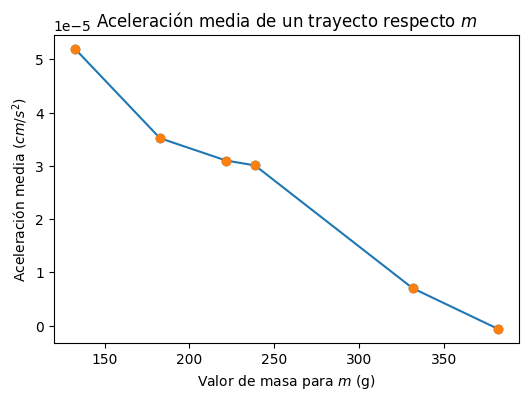

6


In [159]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_y_graficar(tiempos, posiciones, m, M, plot = False):
    # Calculamos las diferencias de tiempo y posición
    dt = np.diff(tiempos)
    dx = np.diff(posiciones)

    # Calculamos la velocidad como la razón de cambio de la posición respecto al tiempo
    velocidades = dx / dt

    # Calculamos la aceleración como la razón de cambio de la velocidad respecto al tiempo
    aceleraciones = np.diff(velocidades) / dt[:-1]
    if plot == True:
        # Ahora puedes graficar los resultados
        plt.figure(figsize=(12, 8))
        
        plt.subplot(2, 2, 1)
        plt.title(f'Posición vs Tiempo (m={m}, M={M})')
        plt.plot(tiempos, posiciones, 'o-')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Posición (m)')

        plt.subplot(2, 2, 2)
        plt.title(f'Velocidad vs Tiempo (m={m}, M={M})')
        plt.plot(tiempos[1:], velocidades, 'o-')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Velocidad (m/s)')

        plt.subplot(2, 2, 3)
        plt.title(f'Aceleración vs Tiempo (m={m}, M={M})')
        plt.plot(tiempos[1:-1], aceleraciones, 'o-')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Aceleración (m/s^2)')

        plt.tight_layout()
        plt.show()
    return np.mean(aceleraciones), np.mean(velocidades)

def acel_vs_masa(datos, valor_m, valor_M ):
    aceleraciones_medias =[]
   
    for i, datos_archivo in enumerate(datos):
        # Extraemos los tiempos y posiciones
        tiempos = [float(dato[0]) for dato in datos_archivo]
        posiciones = [float(dato[1]) for dato in datos_archivo]

        # Restamos el primer tiempo a todos los tiempos
        primer_tiempo = tiempos[0]
        tiempos = [t - primer_tiempo for t in tiempos]

        # Obtenemos las masas m y M para este conjunto de datos
        m, M = valor_m[i-1], valor_M[i-1]

        
        aceleracion_media, velocidades_media = calcular_y_graficar(tiempos, posiciones, m, M)
        if i == 3: print(f" acel = {aceleracion_media} valor =  {valor_m[i]}")
        aceleraciones_medias.append(aceleracion_media)
        if i == 5: break
    # Graficamos la aceleración media en función de m
    aceleraciones_medias, valor_m = zip(*sorted(zip(aceleraciones_medias, valor_m)))
    plt.figure(figsize=(6, 4))
    plt.plot(valor_m, aceleraciones_medias, 'o-')
    plt.errorbar(valor_m, aceleraciones_medias,xerr=0.01, fmt='o')
    plt.title('Aceleración media de un trayecto respecto $m$')
    plt.xlabel('Valor de masa para $m$ (g)')
    plt.ylabel('Aceleración media ($cm/s^2$)')
    plt.show()
    return aceleraciones_medias

aceleracion_media = acel_vs_masa(datos, valor_m, valor_M )
print(len(aceleracion_media))

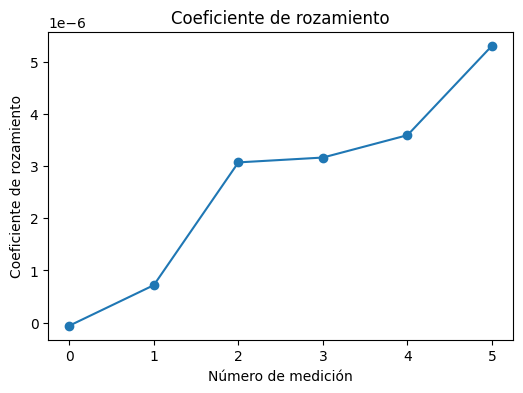

In [160]:
def estimar_coef_rozamiento(aceleracion_media, valor_m, valor_M, plot = False):
    coef_rozamientos = []  # Lista para almacenar los coeficientes de rozamiento
    for a, m in zip(aceleracion_media, valor_m):
        f_friccion = m * a  # F = m*a

        # Calculamos la fuerza normal (asumiendo que el objeto se mueve en un plano horizontal)
        f_normal = m * 9.8  # m*g

        # Calculamos el coeficiente de rozamiento
        coef_rozamiento = f_friccion / f_normal
        coef_rozamientos.append(coef_rozamiento)

    return coef_rozamientos



def graficar_coeficientes(coeficientes):
    plt.figure(figsize=(6, 4))
    plt.plot(coeficientes, 'o-')
    plt.title('Coeficiente de rozamiento')
    plt.xlabel('Número de medición')
    plt.ylabel('Coeficiente de rozamiento')
    plt.show()

    # Llamamos a la función para graficar los coeficientes de rozamiento
   

coef_rozamiento = estimar_coef_rozamiento(aceleracion_media, valor_m, valor_M, plot = False)
graficar_coeficientes(coef_rozamiento)

Media de los coeficientes de rozamiento: 0.3297477492145852
Desviación estándar de los coeficientes de rozamiento: 0.118317734404864


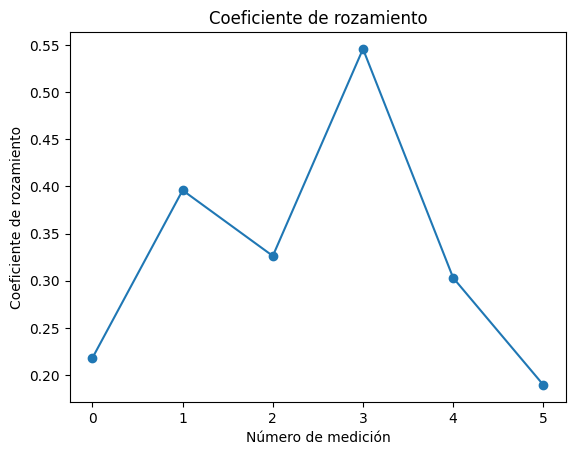

In [161]:
g = 9.81
coeficientes_rozamiento = []
for i in range(len(aceleracion_media)):
    coeficientes_rozamiento.append((valor_M[i]/valor_m[i]) - ((aceleracion_media[i]*(valor_m[i]+valor_M[i]))/(g*valor_m[i]))  )

# Ahora tienes una lista de coeficientes de rozamiento para cada par de masa y aceleración

# Para verificar si el valor de µ es constante, puedes calcular la media y la desviación estándar de los coeficientes de rozamiento
media = np.mean(coeficientes_rozamiento)
desviacion_estandar = np.std(coeficientes_rozamiento)

print(f"Media de los coeficientes de rozamiento: {media}")
print(f"Desviación estándar de los coeficientes de rozamiento: {desviacion_estandar}")
plt.plot(coeficientes_rozamiento, 'o-')
plt.title('Coeficiente de rozamiento')
plt.xlabel('Número de medición')
plt.ylabel('Coeficiente de rozamiento')
plt.show()

[0.0, 0.10000000000000009, 0.20000000000000007, 0.30000000000000004, 0.40000000000000013, 0.5, 0.6000000000000001, 0.7, 0.8, 0.9000000000000001, 1.0, 1.1, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.5999999999999999, 1.7, 1.8, 1.9000000000000001, 2.0, 2.0999999999999996, 2.2, 2.3, 2.4000000000000004, 2.5]


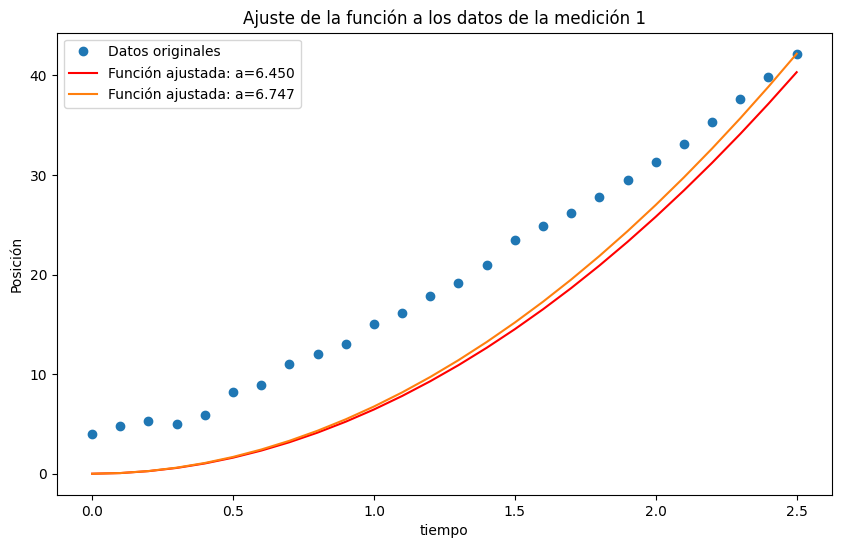

[0.0, 0.10000000000000009, 0.20000000000000018, 0.2999999999999998, 0.3999999999999999, 0.5, 0.5999999999999996, 0.7000000000000002, 0.7999999999999998, 0.9000000000000004]


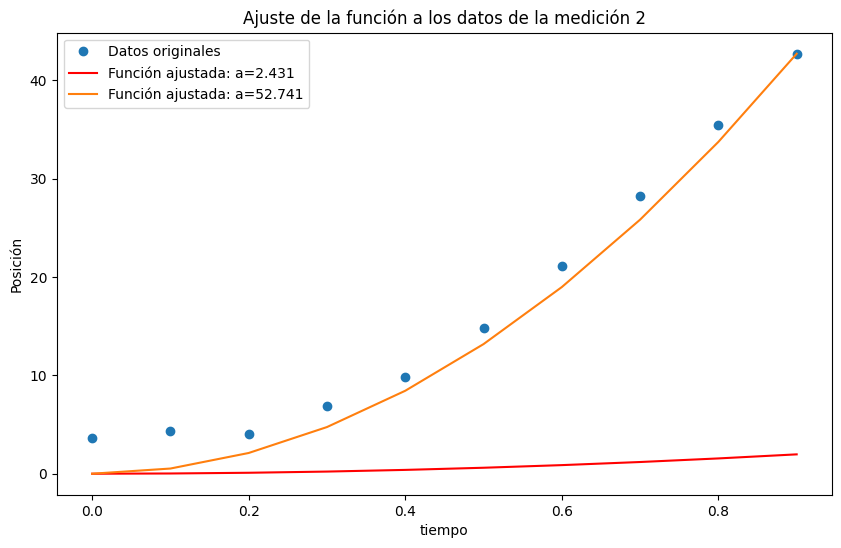

[0.0, 0.10000000000000009, 0.20000000000000018, 0.30000000000000027, 0.3999999999999999, 0.5, 0.6000000000000001, 0.7000000000000002, 0.8000000000000003, 0.8999999999999999]


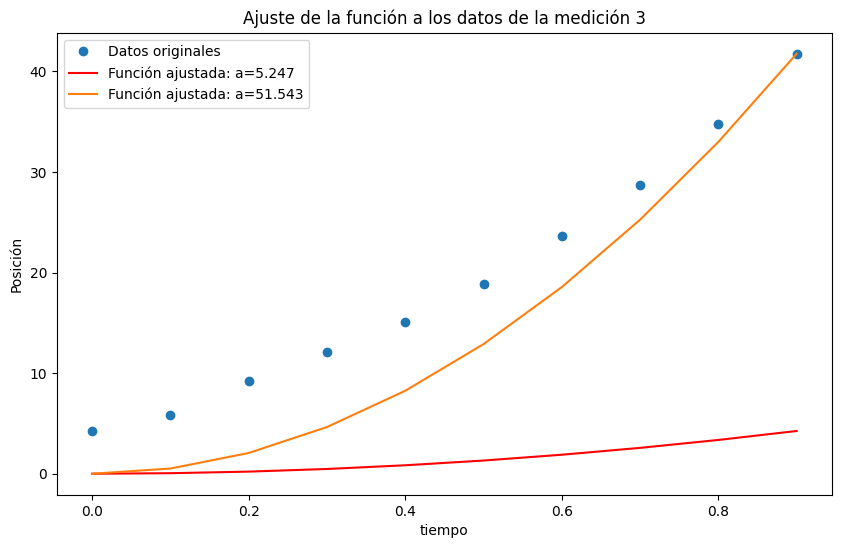

[0.0, 0.09999999999999964, 0.19999999999999973, 0.2999999999999998, 0.3999999999999999, 0.5, 0.5999999999999996, 0.6999999999999997]


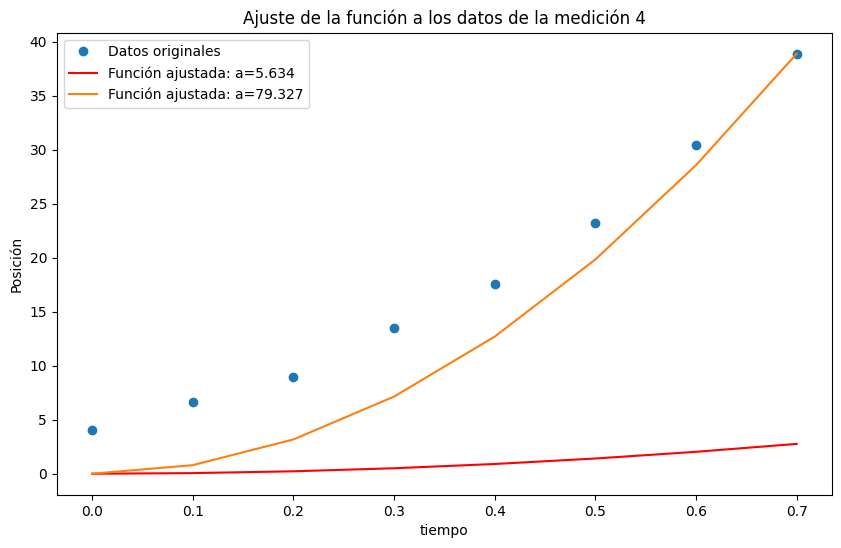

[0.0, 0.09999999999999998, 0.20000000000000007, 0.29999999999999993, 0.4, 0.4999999999999999, 0.6, 0.7000000000000001, 0.7999999999999999, 0.9, 0.9999999999999999]


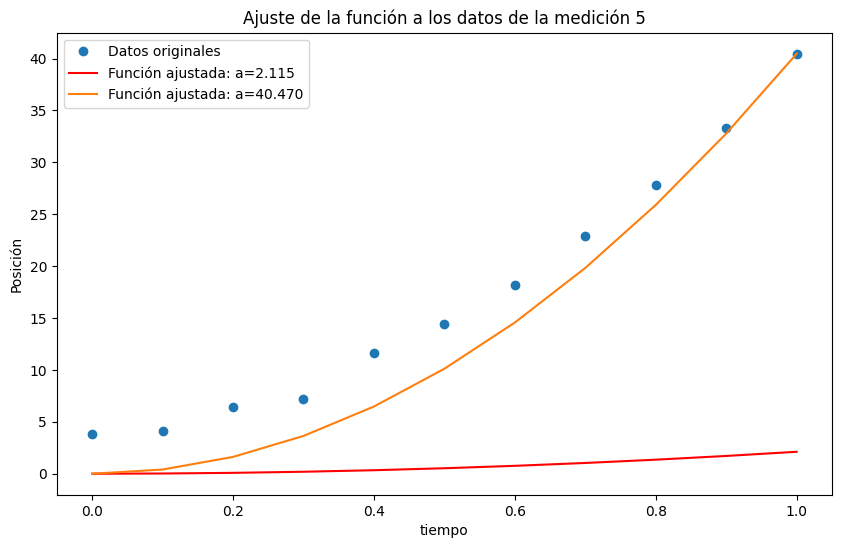

In [175]:
from scipy.optimize import curve_fit

# Definimos la función que queremos ajustar a nuestros datos
import matplotlib.pyplot as plt

# Definimos la función que queremos ajustar a nuestros datos
def func(t, a):
    t = np.array(t)
    return a*(t**2)

# Iteramos sobre las primeras 5 mediciones
for i in range(5):
    # Asegúrate de que las listas de aceleraciones y posiciones tengan la misma longitud
    aceleraciones_i = aceleraciones[i]
    posiciones_i = posiciones[i][:len(aceleraciones_i)]

    # Usamos curve_fit para obtener el valor óptimo de 'a'
    popt, pcov = curve_fit(func, aceleraciones_i/100, posiciones_i)

    # Creamos una serie de valores de tiempo para graficar la función ajustada
    t = tiempos[i][:len(aceleraciones_i)]
    print(t)
    # Creamos el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(t, posiciones_i, 'o', label='Datos originales')
    #plt.plot(t, func(t, *popt), 'r-', label='Función ajustada: a=%5.3f' % tuple(popt))
    valor_real = posiciones_i[-1] / t[-1]**2 
    plt.plot(t, func(t, valor_real), label='Función ajustada: a=%5.3f'% valor_real)
    plt.title('Ajuste de la función a los datos de la medición %d' % (i+1))
    plt.xlabel('tiempo')
    plt.ylabel('Posición')
    plt.legend()
    plt.show()
